# IMPORTING LIBRARIES & DATASET

In this step we import all libraires that is required to proces our datset. Following this we will import our dataset. And the dataset that we use is the Happiness Index dataset

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Importing Dataset
dataset = pd.read_csv("happiness_data.csv")
dataset

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,0.457,0.649,0.243,0.359,0.157,0.075,1.205


# MISSING VALUES

In this stage we will check if there is any missing values that are present in our dataset. this step is essential as presence of mising values could be serious bottlenecks in the processing of our dataset

In [3]:
#Finding Missing Values
print(dataset.isnull().sum())

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64


# DATATYPE

The following step helps to identify the dtatype present in our dataset. 

In [4]:
#Knowing the datatypes
dataset.dtypes

Country name                                   object
Regional indicator                             object
Ladder score                                  float64
Standard error of ladder score                float64
upperwhisker                                  float64
lowerwhisker                                  float64
Logged GDP per capita                         float64
Social support                                float64
Healthy life expectancy                       float64
Freedom to make life choices                  float64
Generosity                                    float64
Perceptions of corruption                     float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual         

# CORRELATION

In this step we analyse the correlation between features . this step is essential as it helps to identify the redundant features in our dataset

<AxesSubplot:>

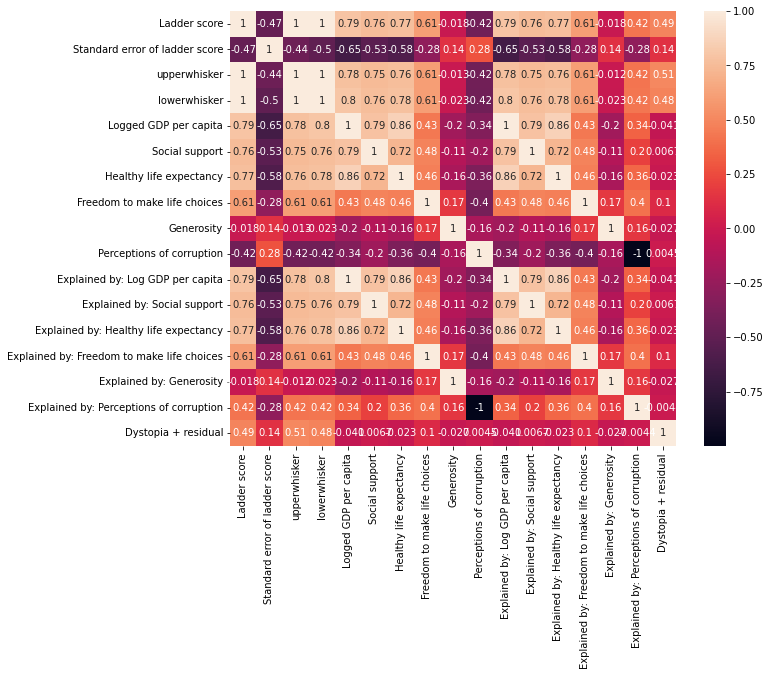

In [5]:
#Finding the correlation between features using Heatmaps
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot = True)

# REMOVING REDUNDANT FEATURES

In this step,we filter out all the redundant features that are not necessary for our analysis. In the below step we take all those features that have correlation above 95%. 

In [6]:
#Finding the features to be dropped
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

#Numeric feature
num_features = dataset.select_dtypes(include=[np.number])
x= num_features

#List of Features to be dropped
corr_features = correlation(x, 0.95)
corr_features

{'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Healthy life expectancy',
 'Explained by: Log GDP per capita',
 'Explained by: Perceptions of corruption',
 'Explained by: Social support',
 'lowerwhisker',
 'upperwhisker'}

In [8]:
#List of Features to be dropped
corr_features = correlation(x, 0.95)
len(set(corr_features))

8

In [9]:
corr_features

{'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Healthy life expectancy',
 'Explained by: Log GDP per capita',
 'Explained by: Perceptions of corruption',
 'Explained by: Social support',
 'lowerwhisker',
 'upperwhisker'}

In [12]:
df_unclean = dataset.drop(labels=['Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Healthy life expectancy',
 'Explained by: Log GDP per capita',
 'Explained by: Perceptions of corruption',
 'Explained by: Social support',
 'lowerwhisker',
 'upperwhisker'],axis=1)
df_unclean

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.400,0.913,0.175,0.338,2.798
...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,7.926,0.787,48.700,0.715,-0.131,0.915,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,9.782,0.784,59.269,0.824,-0.246,0.801,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,7.676,0.552,61.400,0.897,0.061,0.167,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,7.943,0.750,56.201,0.677,-0.047,0.821,1.205


# KNOWING OUR DATASET

In [13]:
df_unclean.describe()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430329
std,1.073924,0.022001,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,0.537645
min,2.523000,0.026000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,0.648000
25%,4.852000,0.043000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.138000
50%,5.534000,0.054000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.509000
75%,6.255000,0.070000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.794000
max,7.842000,0.173000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,3.482000


In [14]:
df_unclean.shape

(149, 11)

In [15]:
#Removing Outliers
df_unclean.dtypes

Country name                       object
Regional indicator                 object
Ladder score                      float64
Standard error of ladder score    float64
Logged GDP per capita             float64
Social support                    float64
Healthy life expectancy           float64
Freedom to make life choices      float64
Generosity                        float64
Perceptions of corruption         float64
Dystopia + residual               float64
dtype: object

# DROPPING STRINGS

Since strings cannot be normalized, we will rmove all the strings in our dataset, before normalizing the data

In [17]:
# Removing strings
df = df_unclean.drop(labels=['Country name','Regional indicator'],axis=1)
df.shape

(149, 9)

# NORMALIZING THE DATASET 

Data Normalization is the process of rescaling the data in a dataset and improving its integrity 
by eliminating data redundancy. 

In [18]:
#Normalize the data attributes 
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
df_scaled = pd.DataFrame(d, columns=names)
df_scaled.head()

,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,1.000000,0.040816,0.826018,0.944231,0.826058,0.964286,0.228916,0.121354,0.919195
1,0.958263,0.061224,0.857542,0.944231,0.850641,0.959184,0.383133,0.113186,0.783345
2,0.949051,0.068027,0.894254,0.921154,0.910342,0.913265,0.377108,0.245041,0.773112
3,0.945854,0.224490,0.846568,1.000000,0.861176,0.974490,0.539759,0.689615,0.818278
4,0.928934,0.006803,0.857342,0.921154,0.840105,0.903061,0.557831,0.298716,0.758645


# DIMENSIONALITY REDUCTION

Dimensionality Reduction is the process by which we convert a high dimensionality dataset
into a low dimensionality dataset. In this step we aim to reduce our dataset into a lower
dimensional dataset that would capture a variance above 90%. 

<function matplotlib.pyplot.show(close=None, block=None)>

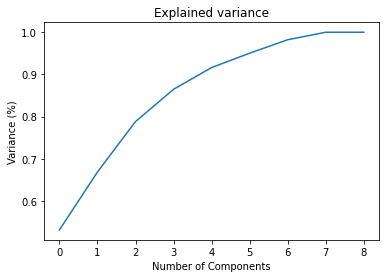

In [19]:
# Plotting graph to find the ideal number of n_components
pca = PCA()
principalcomponents = pca.fit_transform(df_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained variance')
plt.show

The above graph proves that variance above 90% is captured when number of components is
equal to 4.  So, we take the number of components as 4: 

([<matplotlib.axis.XTick at 0x2cbb704d6d0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

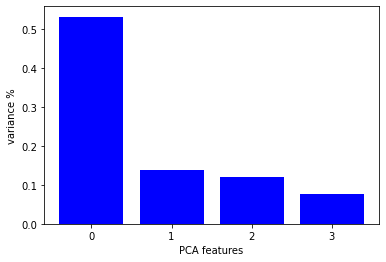

In [23]:
# Create a PCA instance: pca
pca = PCA(n_components= 4)
principalcomponents = pca.fit_transform(df_scaled)


# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='blue')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [24]:
principalcomponents.shape

(149, 4)

In [25]:
final_data = pd.DataFrame(principalcomponents)
final_data

,0,1,2,3
0,-0.812843,-0.403520,-0.033039,-0.364954
1,-0.806137,-0.406561,0.132447,-0.262178
2,-0.795928,-0.303061,0.080548,-0.207664
3,-0.659003,-0.244814,-0.131830,0.223924
4,-0.725330,-0.363897,0.130740,-0.068857
...,...,...,...,...
144,0.782258,0.167867,0.030607,0.112149
145,0.289910,0.478688,0.447787,0.013413
146,0.454698,-0.325152,0.835318,-0.384152
147,0.624717,0.297304,0.358794,0.044177


# IDEAL NUMBER OF CLUSTERS

There are several methods to identify the ideal number of clusters like the yellow brick method, 
Elbow method, Inter cluster distance method, Silhouette score method, etc. For our analysis,
we are taking Elbow method and Silhouette score methods to identify the ideal number of
clusters.

# ELBOW METHOD

Elbow method is a method through which we can identify the ideal number of clusters. In this 
method we plot WCSS (Within-cluster Sum of Squares) and number of clusters in a graph

E:\anaconda_3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda_3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda_3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda_3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

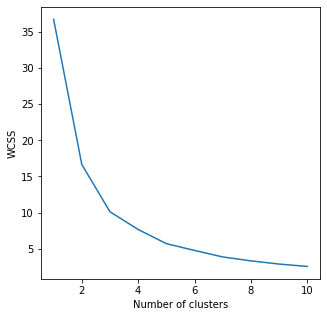

In [27]:
#Determining number of clusters using Elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(final_data.iloc[:,:2])
   wcss.append(model.inertia_)
plt.figure(figsize=(5,5))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# SILHOUETTE SCORE METHOD

In [ ]:
As mentioned before Silhouette score method is method that is used to identify the ideal 
number of clusters. In this method we randomly assign certain number of clusters to calculate
the silhouette score corresponding to each cluster. The ideal cluster is the cluster having the
highest silhouette score. 

In [28]:
#Determining number of clusters using Silhouette score method
import sklearn.cluster as cluster
import sklearn.metrics as metrics

for i in range (2,7):
    labels=cluster.KMeans(n_clusters = i, init="k-means++", random_state=200).fit(final_data).labels_
    print("Silhouette score for k(clusters) = "+str(i)+" is"
         +str(metrics.silhouette_score(final_data, labels,metric="euclidean", sample_size=1000, random_state=200)))

E:\anaconda_3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda_3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda_3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda_3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

Silhouette score for k(clusters) = 2 is0.3740344625192654
Silhouette score for k(clusters) = 3 is0.32799377729184603
Silhouette score for k(clusters) = 4 is0.31804536560774094
Silhouette score for k(clusters) = 5 is0.32092222424289385
Silhouette score for k(clusters) = 6 is0.30112664440587866


E:\anaconda_3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


As we run this code, we will get the silhouette score for each cluster ranging from 2 to 6. From 
the table below we can understand that cluster number 2 is having the highest
silhouette score which is 0.374.  Hence from these two methods we can conclude that the ideal number of clusters is two.

# CLUSTERING 

After reducing the dimensionality and finding the ideal number of clusters, now our data set is 
ready for performing K-Means.

E:\anaconda_3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


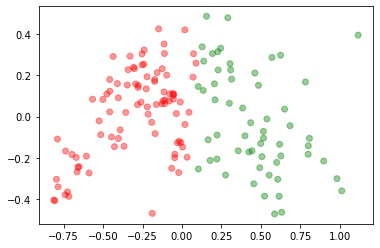

In [29]:
# Clustering using KMeans
import numpy as np
model = KMeans(n_clusters = 2, init = "k-means++")
label = model.fit_predict(final_data.iloc[:,:2])
centers = np.array(model.cluster_centers_)
uniq = np.unique(label)

# colors for plotting
colors = ['red', 'green']
# assign a color to each features (note that we are using features as target)
features_colors = [ colors[label[i]] for i in range(len(final_data.iloc[:,:2])) ]
T=final_data.iloc[:,:2]

# plot the PCA cluster components
plt.scatter(T[0], T[1],
            c=features_colors, marker='o',
            alpha=0.4)

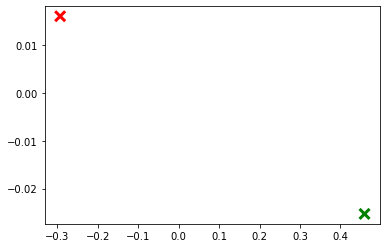

In [30]:
# plot the centroids
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors
        )

# store the values of PCA component in variable: for easy writing
xvector =  pca.components_[0] * max(T[0])
yvector =  pca.components_[1] * max(T[1])
columns = df.columns

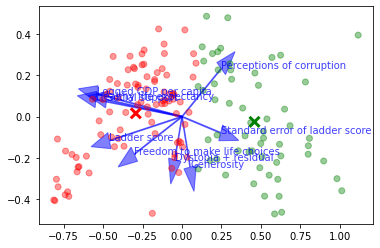

In [31]:
# plot the 'name of individual features' along with vector length
for i in range(len(columns)):
    # plot arrows
    plt.arrow(0, 0, xvector[i], yvector[i],
                color='b', width=0.005,
                head_width=0.08, alpha=0.5
            )
    # plot name of features
    plt.text(xvector[i], yvector[i], list(columns)[i], color='b', alpha=0.75)

plt.scatter(T[0], T[1], 
            c=features_colors, marker='o',
            alpha=0.4)

#plot the centroids
plt.scatter(centers[:, 0], centers[:, 1],
            marker='x', s=100,
            linewidths=3, c=colors )            
plt.show()

# ANALYSIS

Now we got ourdataset divided into two - Cluster 1 and Cluster 2. In one cluster the Perception of corruption and standard error of ladder score is high which we refer as Dystopia countries(58). And the rest belong to Utopia countries(91) 

In [32]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
df_clustered=df_unclean
df_clustered['clusters']=label.tolist()
df_clustered

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,clusters
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,0
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,0
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.400,0.913,0.175,0.338,2.798,0
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,7.926,0.787,48.700,0.715,-0.131,0.915,1.800,1
145,Botswana,Sub-Saharan Africa,3.467,0.074,9.782,0.784,59.269,0.824,-0.246,0.801,0.648,1
146,Rwanda,Sub-Saharan Africa,3.415,0.068,7.676,0.552,61.400,0.897,0.061,0.167,1.095,1
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,7.943,0.750,56.201,0.677,-0.047,0.821,1.205,1


In [34]:
#Dystopia countries
df_clustered[df_clustered.clusters==1]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,clusters
81,Indonesia,Southeast Asia,5.345,0.056,9.365,0.811,62.236,0.873,0.542,0.867,1.987,1
82,Congo (Brazzaville),Sub-Saharan Africa,5.342,0.097,8.117,0.636,58.221,0.695,-0.068,0.745,3.476,1
84,Ivory Coast,Sub-Saharan Africa,5.306,0.078,8.551,0.644,50.114,0.741,-0.016,0.794,3.469,1
86,Nepal,South Asia,5.269,0.070,8.120,0.774,64.233,0.782,0.152,0.727,2.642,1
90,Cameroon,Sub-Saharan Africa,5.142,0.074,8.189,0.710,53.515,0.731,0.026,0.848,3.195,1
91,Senegal,Sub-Saharan Africa,5.132,0.068,8.118,0.710,59.802,0.695,-0.046,0.801,3.071,1
92,Albania,Central and Eastern Europe,5.117,0.059,9.520,0.697,68.999,0.785,-0.030,0.901,2.250,1
94,Ghana,Sub-Saharan Africa,5.088,0.067,8.580,0.727,57.586,0.807,0.123,0.848,2.684,1
95,Niger,Sub-Saharan Africa,5.074,0.102,7.098,0.641,53.780,0.806,0.018,0.693,3.470,1
97,Gambia,Sub-Saharan Africa,5.051,0.089,7.686,0.690,55.160,0.697,0.424,0.746,2.990,1


In [35]:
df_clustered[df_clustered.clusters==1].shape

(58, 12)

In [36]:
#Utopian Countries
df_clustered[df_clustered.clusters==0]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,clusters
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,0
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,0
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.400,0.913,0.175,0.338,2.798,0
...,...,...,...,...,...,...,...,...,...,...,...,...
93,North Macedonia,Central and Eastern Europe,5.101,0.051,9.693,0.805,65.474,0.751,0.038,0.905,2.042,0
96,Turkmenistan,Commonwealth of Independent States,5.066,0.036,9.629,0.983,62.409,0.877,0.273,0.888,1.409,0
103,Turkey,Middle East and North Africa,4.948,0.046,10.240,0.822,67.199,0.576,-0.139,0.776,1.852,0
109,Ukraine,Commonwealth of Independent States,4.875,0.052,9.436,0.888,64.902,0.724,-0.011,0.924,1.813,0


In [38]:
df_clustered.sort_values( by="Ladder score",ascending=False)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,clusters
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,0
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,0
4,Netherlands,Western Europe,7.464,0.027,10.932,0.942,72.400,0.913,0.175,0.338,2.798,0
...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,7.926,0.787,48.700,0.715,-0.131,0.915,1.800,1
145,Botswana,Sub-Saharan Africa,3.467,0.074,9.782,0.784,59.269,0.824,-0.246,0.801,0.648,1
146,Rwanda,Sub-Saharan Africa,3.415,0.068,7.676,0.552,61.400,0.897,0.061,0.167,1.095,1
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,7.943,0.750,56.201,0.677,-0.047,0.821,1.205,1


In [39]:
df_clustered.sort_values( by="Logged GDP per capita",ascending=False)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,clusters
7,Luxembourg,Western Europe,7.324,0.037,11.647,0.908,72.600,0.907,-0.034,0.386,2.653,0
31,Singapore,Southeast Asia,6.377,0.043,11.488,0.915,76.953,0.927,-0.018,0.082,1.379,0
14,Ireland,Western Europe,7.085,0.040,11.342,0.947,72.400,0.879,0.077,0.363,2.384,0
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0
24,United Arab Emirates,Middle East and North Africa,6.561,0.039,11.085,0.844,67.333,0.932,0.074,0.589,2.422,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,Liberia,Sub-Saharan Africa,4.625,0.106,7.288,0.720,56.498,0.735,0.050,0.850,2.857,1
114,Mozambique,Sub-Saharan Africa,4.794,0.103,7.158,0.744,54.706,0.882,0.061,0.684,2.783,1
95,Niger,Sub-Saharan Africa,5.074,0.102,7.098,0.641,53.780,0.806,0.018,0.693,3.470,1
143,Malawi,Sub-Saharan Africa,3.600,0.092,6.958,0.537,57.948,0.780,0.038,0.729,2.190,1


In [40]:
df_clustered.sort_values( by="Social support",ascending=False)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,clusters
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,0
96,Turkmenistan,Commonwealth of Independent States,5.066,0.036,9.629,0.983,62.409,0.877,0.273,0.888,1.409,0
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0
5,Norway,Western Europe,7.392,0.035,11.053,0.954,73.300,0.960,0.093,0.270,2.580,0
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,0
...,...,...,...,...,...,...,...,...,...,...,...,...
142,Haiti,Latin America and Caribbean,3.615,0.173,7.477,0.540,55.700,0.593,0.422,0.721,2.060,1
143,Malawi,Sub-Saharan Africa,3.600,0.092,6.958,0.537,57.948,0.780,0.038,0.729,2.190,1
139,Burundi,Sub-Saharan Africa,3.775,0.107,6.635,0.490,53.400,0.626,-0.024,0.607,2.876,1
98,Benin,Sub-Saharan Africa,5.045,0.073,8.087,0.489,54.713,0.757,-0.034,0.661,3.482,1


In [41]:
df_clustered.sort_values( by="Healthy life expectancy",ascending=False)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,clusters
31,Singapore,Southeast Asia,6.377,0.043,11.488,0.915,76.953,0.927,-0.018,0.082,1.379,0
76,Hong Kong S.A.R. of China,East Asia,5.477,0.049,11.000,0.836,76.820,0.717,0.067,0.403,1.236,0
55,Japan,East Asia,5.940,0.040,10.611,0.884,75.100,0.796,-0.258,0.638,2.048,0
26,Spain,Western Europe,6.491,0.042,10.571,0.932,74.700,0.761,-0.081,0.745,2.513,0
2,Switzerland,Western Europe,7.571,0.036,11.117,0.942,74.400,0.919,0.025,0.292,2.839,0
...,...,...,...,...,...,...,...,...,...,...,...,...
129,Swaziland,Sub-Saharan Africa,4.308,0.071,9.065,0.770,50.833,0.647,-0.185,0.708,2.155,1
84,Ivory Coast,Sub-Saharan Africa,5.306,0.078,8.551,0.644,50.114,0.741,-0.016,0.794,3.469,1
115,Nigeria,Sub-Saharan Africa,4.759,0.052,8.533,0.740,50.102,0.737,0.037,0.878,2.736,1
144,Lesotho,Sub-Saharan Africa,3.512,0.120,7.926,0.787,48.700,0.715,-0.131,0.915,1.800,1


In [42]:
df_clustered.sort_values( by="Freedom to make life choices",ascending=False)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,clusters
41,Uzbekistan,Commonwealth of Independent States,6.179,0.068,8.836,0.918,65.255,0.970,0.311,0.515,2.477,0
5,Norway,Western Europe,7.392,0.035,11.053,0.954,73.300,0.960,0.093,0.270,2.580,0
113,Cambodia,Southeast Asia,4.830,0.067,8.360,0.765,62.000,0.959,0.034,0.843,2.148,1
3,Iceland,Western Europe,7.554,0.059,10.878,0.983,73.000,0.955,0.160,0.673,2.967,0
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0
...,...,...,...,...,...,...,...,...,...,...,...,...
134,Madagascar,Sub-Saharan Africa,4.208,0.072,7.396,0.686,59.305,0.552,-0.005,0.803,2.620,1
130,Comoros,Sub-Saharan Africa,4.289,0.084,8.031,0.626,57.349,0.548,0.082,0.781,2.610,1
122,Lebanon,Middle East and North Africa,4.584,0.055,9.626,0.848,67.355,0.525,-0.073,0.898,1.736,1
108,Algeria,Middle East and North Africa,4.887,0.053,9.342,0.802,66.005,0.480,-0.067,0.752,2.242,1


In [43]:
df_clustered.sort_values( by="Generosity",ascending=False)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,clusters
81,Indonesia,Southeast Asia,5.345,0.056,9.365,0.811,62.236,0.873,0.542,0.867,1.987,1
125,Myanmar,Southeast Asia,4.426,0.052,8.541,0.779,59.302,0.876,0.509,0.660,1.407,1
97,Gambia,Sub-Saharan Africa,5.051,0.089,7.686,0.690,55.160,0.697,0.424,0.746,2.990,1
142,Haiti,Latin America and Caribbean,3.615,0.173,7.477,0.540,55.700,0.593,0.422,0.721,2.060,1
41,Uzbekistan,Commonwealth of Independent States,6.179,0.068,8.836,0.918,65.255,0.970,0.311,0.515,2.477,0
...,...,...,...,...,...,...,...,...,...,...,...,...
107,Georgia,Commonwealth of Independent States,4.891,0.054,9.585,0.671,64.300,0.783,-0.238,0.655,2.191,1
57,Portugal,Western Europe,5.929,0.055,10.421,0.879,72.600,0.892,-0.244,0.887,2.225,0
145,Botswana,Sub-Saharan Africa,3.467,0.074,9.782,0.784,59.269,0.824,-0.246,0.801,0.648,1
55,Japan,East Asia,5.940,0.040,10.611,0.884,75.100,0.796,-0.258,0.638,2.048,0


In [44]:
df_clustered.sort_values( by="Perceptions ofcorruption",ascending=False)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,clusters
59,Croatia,Central and Eastern Europe,5.882,0.048,10.217,0.924,70.799,0.754,-0.118,0.939,2.325,0
45,Romania,Central and Eastern Europe,6.140,0.057,10.284,0.832,67.355,0.845,-0.219,0.938,2.830,0
87,Bulgaria,Central and Eastern Europe,5.266,0.054,10.016,0.931,67.000,0.788,-0.096,0.932,1.823,0
63,Bosnia and Herzegovina,Central and Eastern Europe,5.813,0.050,9.590,0.870,68.098,0.706,0.113,0.931,2.583,0
148,Afghanistan,South Asia,2.523,0.038,7.695,0.463,52.493,0.382,-0.102,0.924,1.895,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6,Sweden,Western Europe,7.363,0.036,10.867,0.934,72.700,0.945,0.086,0.237,2.683,0
0,Finland,Western Europe,7.842,0.032,10.775,0.954,72.000,0.949,-0.098,0.186,3.253,0
1,Denmark,Western Europe,7.620,0.035,10.933,0.954,72.700,0.946,0.030,0.179,2.868,0
146,Rwanda,Sub-Saharan Africa,3.415,0.068,7.676,0.552,61.400,0.897,0.061,0.167,1.095,1
